In [5]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [6]:
# Data: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

# Input Features: ['preg_count', 'glucose_concentration', 'diastolic_bp',
#       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
#       'diabetes_pedi', 'age']

# Target: 'diabetes_class'. 1 => Diabetic. 0 => Normal.

# Objective: Predict probability of diabetes

# Actual Positives: 268 (diabetic)
# Actual Negatives: 500 (normal)

# Diabetes Dataset Size: 768 samples

# Training + Eval set: 710 samples

# Test set: 58 samples

In [7]:
data_path = r'C:\AWSMLCourse\Data\ClassExamples\DiabetesData'

In [8]:
df = pd.read_csv(os.path.join(data_path,'pima-indians-diabetes.data.txt'))

In [9]:
df.columns

Index(['preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age', 'diabetes_class'],
      dtype='object')

In [10]:
df.shape

(768, 9)

In [11]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.diabetes_class.value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [13]:
df.corr()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
preg_count,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps_skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
two_hr_serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes_class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
temp_diabetic = df.diabetes_class == 1

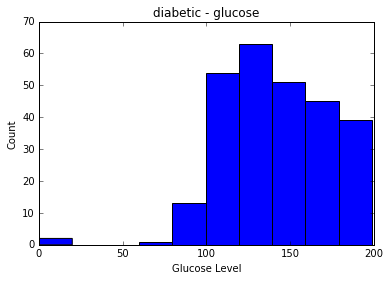

In [15]:
# Diabetic glucose concentration histogram
plt.hist(df[temp_diabetic].glucose_concentration)
plt.title('diabetic - glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Count')

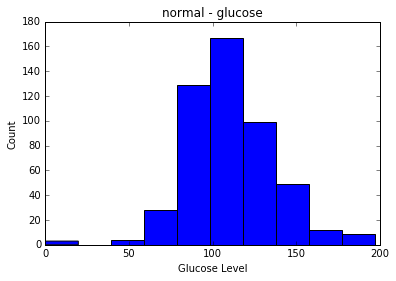

In [16]:
# Diabetic glucose concentration histogram
plt.hist(df[~temp_diabetic].glucose_concentration)
plt.title('normal - glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Count')

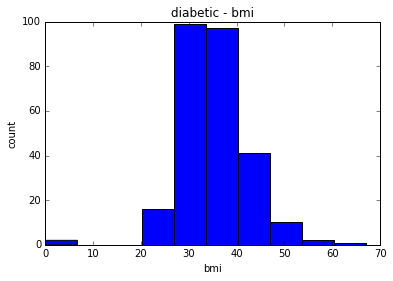

In [17]:
plt.hist(df[temp_diabetic].bmi)
plt.xlabel('bmi')
plt.ylabel('count')
plt.title('diabetic - bmi')

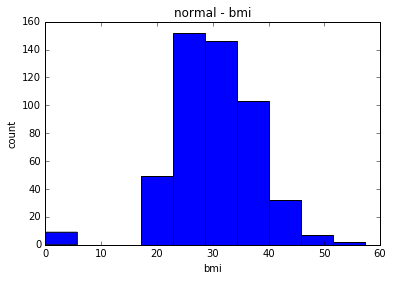

In [18]:
plt.hist(df[~temp_diabetic].bmi)
plt.xlabel('bmi')
plt.ylabel('count')
plt.title('normal - bmi')

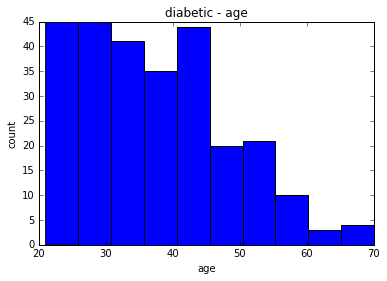

In [19]:
plt.hist(df[temp_diabetic].age)
plt.xlabel('age')
plt.ylabel('count')
plt.title('diabetic - age')

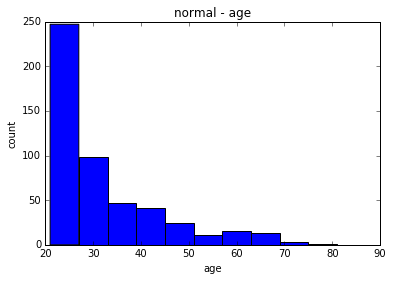

In [20]:
plt.hist(df[~temp_diabetic].age)
plt.xlabel('age')
plt.ylabel('count')
plt.title('normal - age')

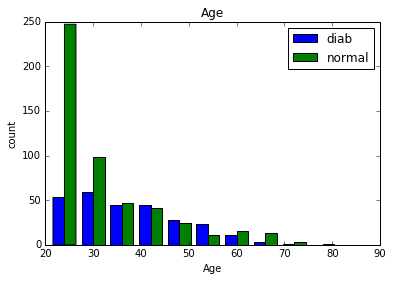

In [21]:
plt.hist([df[temp_diabetic].age,
          df[~temp_diabetic].age],
        label=['diab','normal'])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age')
plt.legend()

In [22]:
df_train_eval = df.ix[range(0,710)]
df_test_eval = df.ix[range(710,768)]

In [23]:
df_train_eval.to_csv(os.path.join(data_path,'diabetes_data_train_710samples.csv'),
                     index=True,index_label='Row')

In [24]:
df_test_eval.to_csv(os.path.join(data_path,'diabetes_data_eval_58samples.csv'),
                     index=True,index_label='Row')

In [25]:
# export all columns except for target attribute
df.to_csv(os.path.join(data_path,'diabetest_data_test_all.csv'),index=True,index_label='Row',
         columns=df.columns[:-1])

In [26]:
# Predicted Output
df_predicted = pd.read_csv(os.path.join(data_path,
                                        'output',
                                        'bp-7QqghBonQP0-diabetest_data_test_all.csv.gz'))

In [27]:
df_predicted.head()

,tag,bestAnswer,score
0,0,1,0.644611
1,1,0,0.088800
2,2,1,0.712889
3,3,0,0.084839
4,4,1,0.853618


In [28]:
diab_table = pd.crosstab(
    df.diabetes_class, 
    df_predicted.bestAnswer, 
    rownames = ['Actual'], 
    colnames=['Predicted'])

In [29]:
# Important to build a confusion matrix or contingency matrix
# Shows how many were correctly classified and how many mis-classification occured
# Helpful when positive samples are small in number
diab_table 

Predicted,0,1
Actual,,
0,442,58
1,112,156


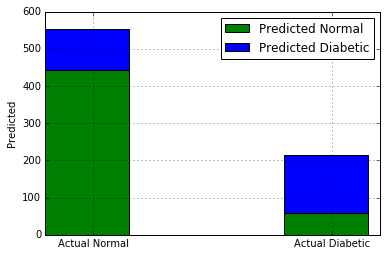

In [30]:
plt.bar([0,1],diab_table.ix[0],width=.35, label='Predicted Normal', color='g')
plt.bar([0,1], diab_table.ix[1],width=.35, color='b', label='Predicted Diabetic', bottom=diab_table.ix[0])
plt.ylabel('Predicted')
plt.xticks([0.2,1.2], ('Actual Normal', 'Actual Diabetic'))
plt.grid()
plt.legend()

<h4>AWS ML Evaluation Metric</h4>
Area Under Curve<br>

<p>AUC is a curve formed by plotting True Positive Rate against False Positive Rate at different cut-off threshholds.</p>

<ul>
<li>AUC metric closer to 1 indicates highly accurate prediction</li>
<li>AUC metric 0.5 indicates random guess - Baseline AUC</li>
<li>AUC metric closer to 0 indicates model has learned from the features, but predictions are flipped</li>
</ul>
1. AUC for Diabetes model: 0.87 (evaluation set 1)
2. AUC for Diabetes model: 0.88 (evaluation set 2)

http://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html?icmpid=docs_machinelearning_console

In [32]:
# Example to show how to compute metrics.
# AWS ML Provides all these metrics under evaluation
actual_negative = df.diabetes_class.value_counts()[0]
actual_positive = df.diabetes_class.value_counts()[1]
actual_count = actual_negative + actual_positive

In [33]:
actual_negative, actual_positive

(500, 268)

In [34]:
true_negative = diab_table.ix[0][0]
false_positive = diab_table.ix[0][1]
true_positive = diab_table.ix[1][1]
false_negative = diab_table.ix[1][0]

In [35]:
diab_table

Predicted,0,1
Actual,,
0,442,58
1,112,156


In [36]:
true_negative,false_positive

(442, 58)

In [37]:
true_positive,false_negative

(156, 112)

In [38]:
# Accuracy - larger value indicates better predictive accuracy
# How many were correctly classified?
accuracy = (true_negative+true_positive)/actual_count
print('Accuracy = {0:3.2f}'.format(accuracy))

Accuracy = 0.78


In [39]:
# True Positive Rate (also known as Recall) - larger value indicates better predictive accuracy
# Out of all positive, how many were correctly predicted as positive
tpr = true_positive/actual_positive
print('Probability of detection. TPR = {0:3.2f}'.format(tpr))


Probability of detection. TPR = 0.58


In [41]:
# False Positive Rate - smaller value indicates better predictive accuracy
# Out of all negatives, how many were incorrectly predicted as positive
fpr = false_positive/actual_negative
print('Probability of false alarm. FPR = {0:3.2f}'.format(fpr))

Probability of false alarm. FPR = 0.12


In [43]:
# Precision - out of all predicted as positive, how many are true positive?
# Larger value indicates better predictive accuracy
precision = true_positive/(true_positive+false_positive)
print('Precision = {0:3.2f}'.format(precision))

Precision = 0.73


<h4>Summary</h4>
For Binary Classification, Area Under Curve (AUC) is the evaluation metric to assess the quality of model.<br>

<p>AUC is the area of a curve formed by plotting True Positive Rate against False Positive Rate at different cut-off thresholds.</p>

<ul>
<li>AUC metric closer to 1 indicates highly accurate prediction</li>
<li>AUC metric 0.5 indicates random guess - Baseline AUC</li>
<li>AUC metric closer to 0 indicates model has learned from the features, but predictions are flipped</li>
</ul>

<p>Advanced Metrics</p>
<ul>
<li>Accuracy - Fraction of correct predictions. Larger value indicates better predictive accuracy</li>
<li>True Positive Rate - Probability of detection. Out of all positive, how many were correctly predicted as positive. Larger value indicates better predictive accuracy</li>
<li>False Positive Rate - Probability of false alarm. Smaller value indicates better predictive accuracy. Out of all negatives, how many were incorrectly predicted as positive.</li>
<li>Precision - out of all predicted as positive, how many are true positive? Larger value indicates better predictive accuracy</li>
</ul>